In [1]:
# Install the package, if not already installed.
 install.packages("datarium")
#Importing the package


package 'datarium' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpCsAl2r\downloaded_packages


In [2]:
library(datarium)

Warning message:
"package 'datarium' was built under R version 3.6.3"

In [3]:
data <- marketing
head(data)

youtube,facebook,newspaper,sales
276.12,45.36,83.04,26.52
53.40,47.16,54.12,12.48
20.64,55.08,83.16,11.16
181.80,49.56,70.20,22.20
216.96,12.96,70.08,15.48
10.44,58.68,90.00,8.64


In [4]:
summary(data)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [5]:
#Correlation matrix for the dataset
cor(data)

,youtube,facebook,newspaper,sales
youtube,1.00000000,0.05480866,0.05664787,0.7822244
facebook,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


# Task 5.1: Perform different types of regression on the data
Linear Regression Since sales has highest correlation with youtube column, we'll consider linear regression between sales and youtube.
Formula: y = ax + b

In [6]:
#Creating Linear Regression model and printing the summary
lr <- lm(sales~youtube,data = data)
summary(lr)


Call:
lm(formula = sales ~ youtube, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0632  -2.3454  -0.2295   2.4805   8.6548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.439112   0.549412   15.36   <2e-16 ***
youtube     0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.91 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [7]:
#Making a prediction using the model for tuple = (180, 30, 30)
new_data <- data.frame(youtube=180,facebook=30,newspaper=30)
predict(lr,new_data)

1 
16.99571

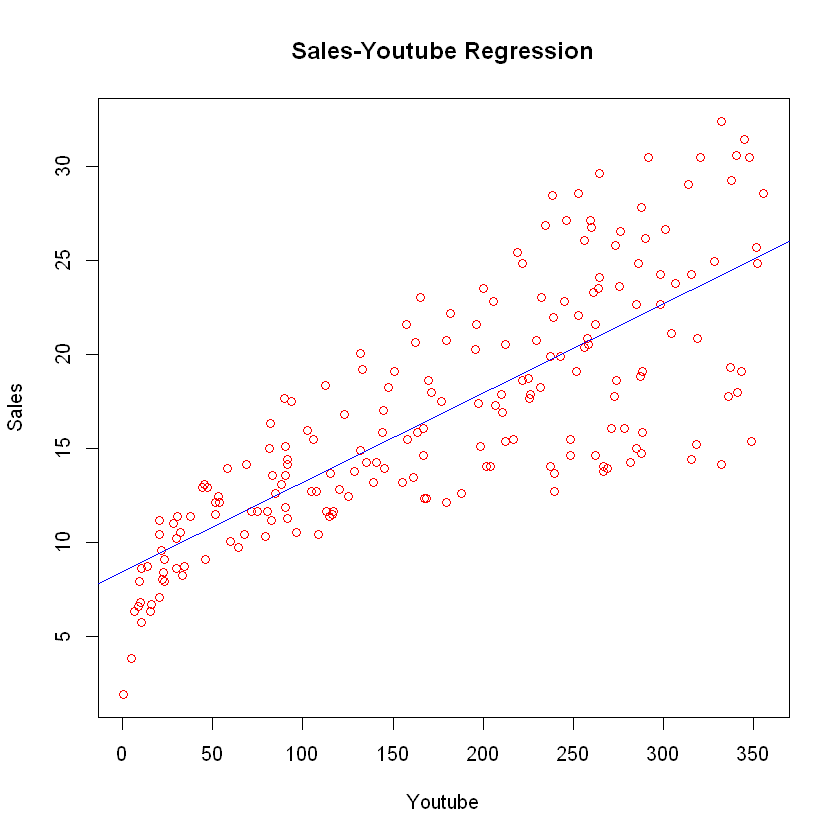

In [8]:
#Visualising the regression line created
plot(x=data$youtube, y=data$sales, col="red", main="Sales-Youtube Regression",xlab="Youtube",ylab="Sales")
abline(lr,col="blue")

# Multiple Regression: 
For multiple regression, we'll use all the independent columns to create our model.
Formula: y = ax1 + bx2 + cx3 + d


In [9]:
#Creating the multiple regression model and printing its summary
mr <- lm(sales~youtube+facebook+newspaper, data = data)
summary(mr)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5932  -1.0690   0.2902   1.4272   3.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.526667   0.374290   9.422   <2e-16 ***
youtube      0.045765   0.001395  32.809   <2e-16 ***
facebook     0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.023 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


In [10]:
# Predicting on new_data
predict(mr,newdata = new_data)

1 
17.38908

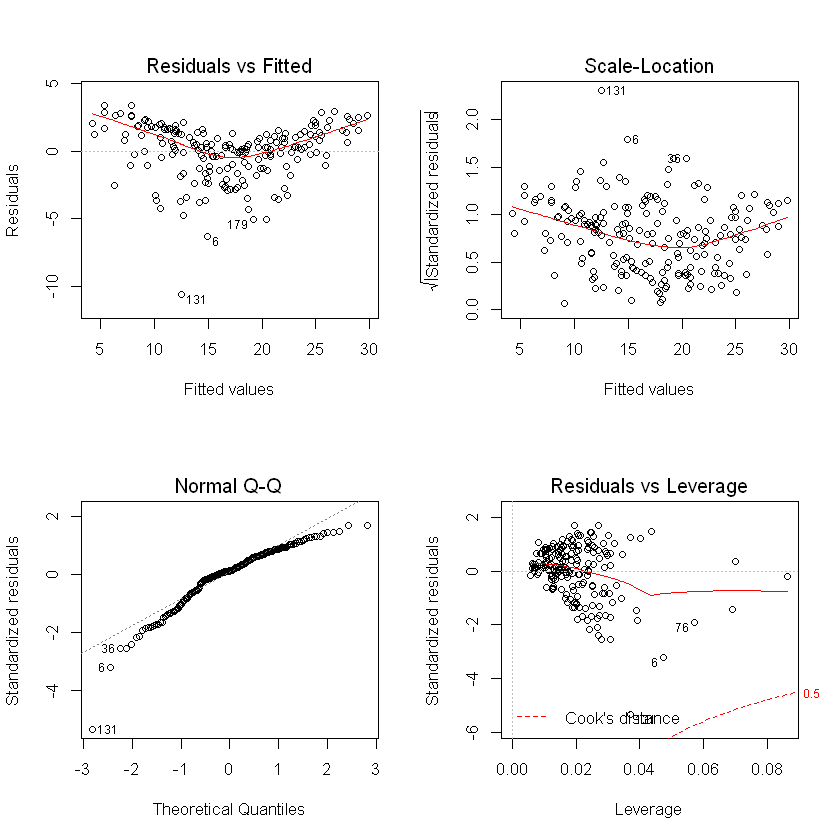

In [11]:
#Visualising the multiple regression model
layout(matrix(c(1,2,3,4),2,2))
plot(mr)

# Curvilinear (Polynomial) Regression
Formula: y = a + bx + cx2


In [12]:
#Generating curvilinear regression model using lm function
cpr.lm <- lm(sales~youtube+I(youtube^2),data = data)
summary(cpr.lm)


Call:
lm(formula = sales ~ youtube + I(youtube^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2213 -2.1412 -0.1874  2.4106  9.0117 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.337e+00  7.911e-01   9.275  < 2e-16 ***
youtube       6.727e-02  1.059e-02   6.349 1.46e-09 ***
I(youtube^2) -5.706e-05  2.965e-05  -1.924   0.0557 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.884 on 197 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.6152 
F-statistic: 160.1 on 2 and 197 DF,  p-value: < 2.2e-16


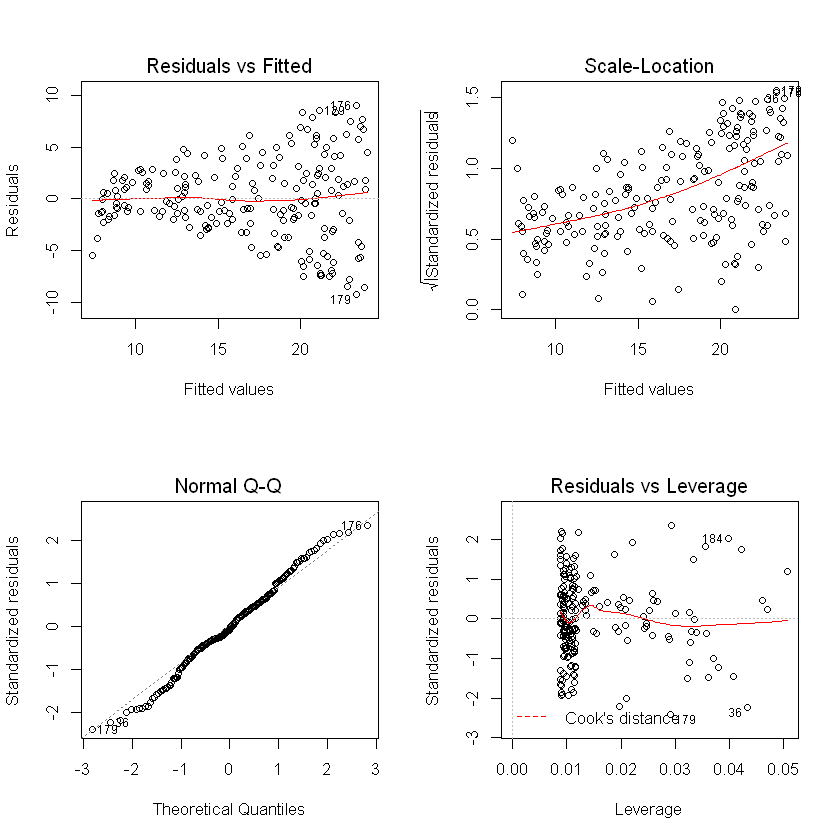

In [13]:
#Visualising the model
layout(matrix(c(1,2,3,4),2,2))
plot(cpr.lm)

In [14]:
#Generating curvilinear regression model using nls function
cpr.nls <- nls(formula = sales~a+b*I(youtube^z),data = data,
 start = list(a=1,b=1,z=2))
summary(cpr.nls)


Formula: sales ~ a + b * I(youtube^z)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a   4.8546     1.9635   2.472   0.0143 *  
b   0.5754     0.4754   1.210   0.2276    
z   0.5977     0.1281   4.667 5.64e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.859 on 197 degrees of freedom

Number of iterations to convergence: 47 
Achieved convergence tolerance: 4.195e-06


# Power Curve Regression
Formula: y = ax^b


In [15]:
# Generating the model
pcr <- lm(log(data$sales)~log(data$youtube))
summary(pcr)



Call:
lm(formula = log(data$sales) ~ log(data$youtube))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43349 -0.15917  0.01696  0.16910  0.39399 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.02284    0.07372   13.87   <2e-16 ***
log(data$youtube)  0.35504    0.01487   23.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2109 on 198 degrees of freedom
Multiple R-squared:  0.7421,	Adjusted R-squared:  0.7408 
F-statistic: 569.8 on 1 and 198 DF,  p-value: < 2.2e-16


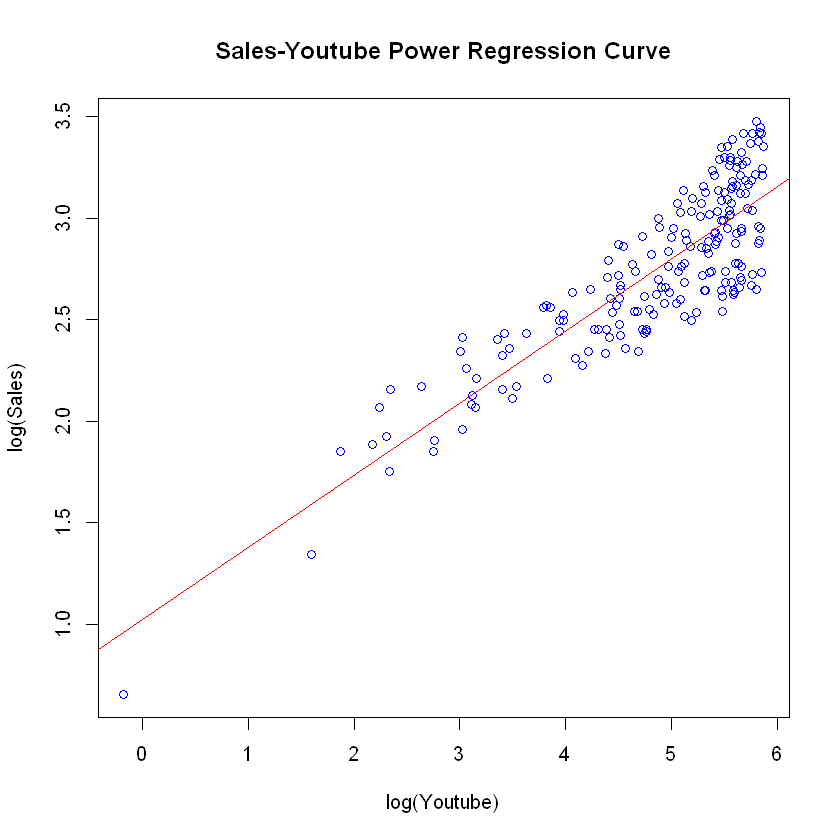

In [16]:
# Visualising the model
plot(x=log(data$youtube), y=log(data$sales), col="blue",main="Sales-Youtube Power Regression Curve", xlab="log(Youtube)",ylab="log(Sales)")
abline(pcr,col="red")

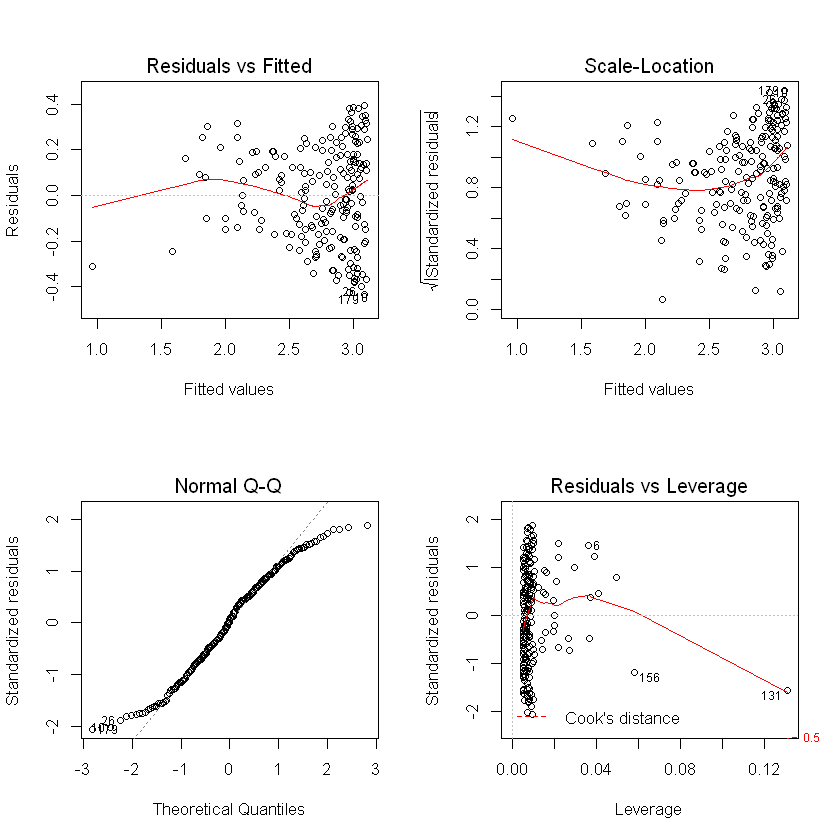

In [17]:
layout(matrix(c(1,2,3,4),2,2))
plot(pcr)

# Exponential Regression Curve
Formula: y = abx


In [18]:
# Creating the model
erc <- lm(log(data$sales)~data$youtube)
summary(erc)


Call:
lm(formula = log(data$sales) ~ data$youtube)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.53984 -0.13125  0.03008  0.16696  0.42554 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.1895138  0.0361853   60.51   <2e-16 ***
data$youtube 0.0031555  0.0001772   17.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2575 on 198 degrees of freedom
Multiple R-squared:  0.6156,	Adjusted R-squared:  0.6137 
F-statistic: 317.1 on 1 and 198 DF,  p-value: < 2.2e-16


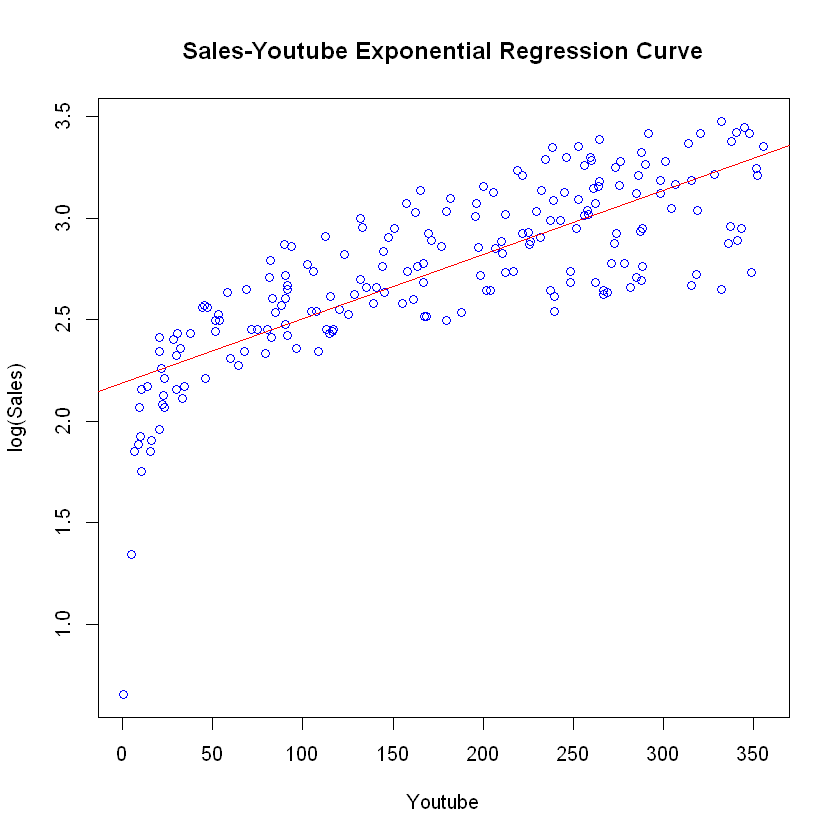

In [19]:
# Visualising the model
plot(x=data$youtube, y=log(data$sales), col="blue",main="Sales-Youtube Exponential Regression Curve",xlab="Youtube",ylab="log(Sales)")
abline(erc,col="red")


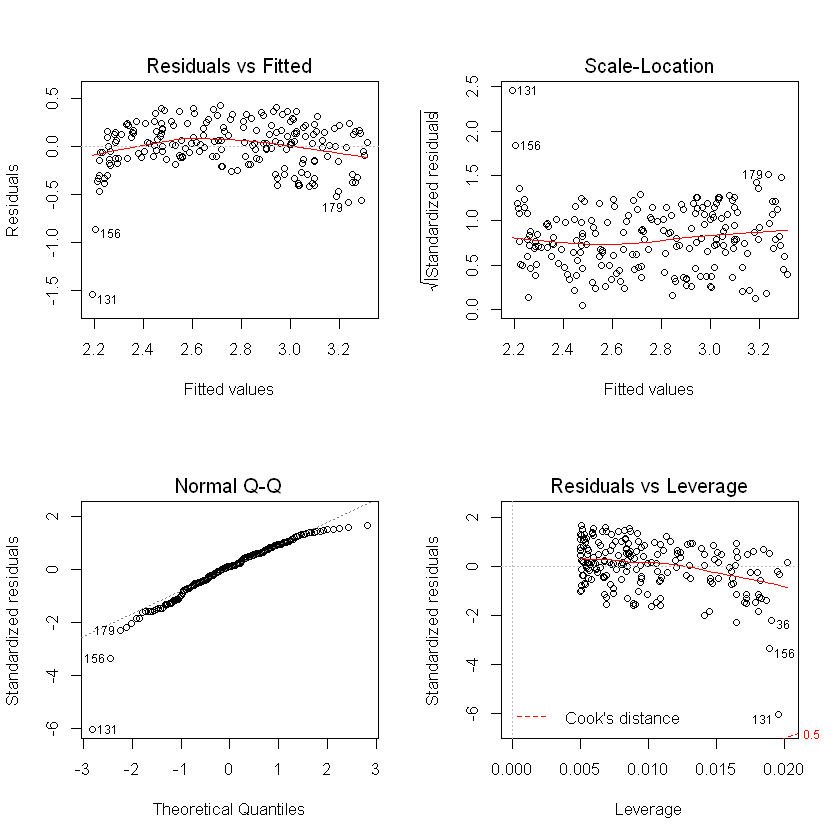

In [20]:
layout(matrix(c(1,2,3,4),2,2))
plot(erc)

# Lasso Regression


In [21]:
#Importing the required package
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [22]:
#Preparing data to pass into function
x <- as.matrix(data[1:3])
y <- data$sales
lambdas <- 10^seq(2, -3, by = -.1)


#Implementing the lasso regression for different lambdas
lasso_reg <- cv.glmnet(x, y, alpha = 1, lambda = lambdas,
 standardize = TRUE, nfolds = 5)


#Setting the best value of lambda
lambda_best <- lasso_reg$lambda.min


#Creating the model
lasso_model <- glmnet(x, y, alpha = 1, lambda = lambda_best, standardize = TRUE)
lasso_model



Call:  glmnet(x = x, y = y, alpha = 1, lambda = lambda_best, standardize = TRUE) 

     Df   %Dev  Lambda
[1,]  2 0.8969 0.07943

In [23]:
#Printing the summary of model
summary(lasso_model)

          Length Class     Mode   
a0        1      -none-    numeric
beta      3      dgCMatrix S4     
df        1      -none-    numeric
dim       2      -none-    numeric
lambda    1      -none-    numeric
dev.ratio 1      -none-    numeric
nulldev   1      -none-    numeric
npasses   1      -none-    numeric
jerr      1      -none-    numeric
offset    1      -none-    logical
call      6      -none-    call   
nobs      1      -none-    numeric

# Ridge Regression


In [24]:
#Finding optimal value of lambda
cv_ridge <- cv.glmnet(x, y, alpha = 0, lambda = lambdas)
optimal_lambda <- cv_ridge$lambda.min

#Generating the model
ridge_model = glmnet(x, y, alpha = 0, family = 'gaussian',lambda = optimal_lambda)
ridge_model



Call:  glmnet(x = x, y = y, family = "gaussian", alpha = 0, lambda = optimal_lambda) 

     Df   %Dev   Lambda
[1,]  3 0.8972 0.003981

In [25]:
#Printing the summary of model
summary(ridge_model)

          Length Class     Mode   
a0        1      -none-    numeric
beta      3      dgCMatrix S4     
df        1      -none-    numeric
dim       2      -none-    numeric
lambda    1      -none-    numeric
dev.ratio 1      -none-    numeric
nulldev   1      -none-    numeric
npasses   1      -none-    numeric
jerr      1      -none-    numeric
offset    1      -none-    logical
call      6      -none-    call   
nobs      1      -none-    numeric

# Task 5.2: Design your function to calculate linear regression with gradient descent.


In [26]:
lr_gradientDescent <- function(x, y, lr=0.0001, epochs=1000){
 # x = values of independent variable
 # y = actual values of target variable
 # lr = Learning rate
 # epochs = no. of iterations the algorithm should run for

 #Initial values of m and c
 m <- rnorm(1,0,1)
 c <- rnorm(1,0,1)

 n <- length(x)

 #Initial prediction and error
 predicted <- m*x + c
 sse <- (sum((y - predicted))**2) / 2

 for(i in c(1:epochs)){
 #Finding out the derivatives w.r.t. m and c, resp.
 curl_m <- (-1/n) * sum((y - predicted)*x)
 curl_c <- (-1/n) * sum(y-predicted)

 #Finding out new values of m, c
 m_new <- m + lr*curl_m
 c_new <- c + lr*curl_c

 #Calculating prediction and error with updated values
 predicted <- m_new*x + c_new
 sse_new <- (sum((y - predicted))**2) / 2

 #Break if the error increases
 if(sse_new > sse ){
 break
 }else{
 sse <- sse_new
 m <- m_new
 c <- c_new
 }
 }

 m <- format(m,digits = 4)
 c <- format(c,digits = 4)

 print(paste("Required regression line is: y = ",m,"x + ",c))
}
lr_gradientDescent(data$youtube, data$sales)

[1] "Required regression line is: y =  1.072 x +  1.394"


# END